# Breast Cancer Prediction 

# Introduction

#### Breast Cancer :-
Breast cancer is the most common cancer amongst women in India.

Breast cancer occurs when some breast cells begin to grow abnormally. These cells divide more rapidly than healthy cells and continue to gather, forming a lump or mass. 
Researchers have identified hormonal, lifestyle and environmental factors that may increase the risk.


Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

#### Business Goal:
We are required to model the diagnosis of Breast Cancer with the available independent variables. Which will help us to check, what kind of Breast Cancer does the patient has(Malignant or Benign).We have some independent features which tells us the some real valued features which are computed for each cell nucleus under observation. This will not only tell about the type of cancer but if observed in any, it will help the doctors for quick reflex action for medication and cure , plus also informing about the stage of the cancer and the medication with respect to it.

So, Our Aim is to check for the model predictions for the diagnosis process, ie; How good or accurate our model is performing to check for the diagnosis observed. For checking the accuracy we will be using two of our models ie; Logistic Regression and K-Nearest Neighbors Classifier. And Later on, we will be comparing the two of them to check for the better performance, with the help of accuracy score and confusion matrix including the classification report.

So let's have a brief discussion about the KNN classifier having the confusion matrix and classification report and the factors important in it.
- In the confusion matrix, we have actual labels and the predicted labels, where we also have False positive and False Negative rates which is also known as Type-1 error and Type-2 error respectively, with the addition of True Positive and True Negative rates.
- False positive(FP) and False Negative(FN) has the percentage of Precision and Recall respectively.

- Precision : It is the percentage of the FP rate, which describes - if the patient doesn't have the cancer but our model predicted that the person has the cancer(ie; non-event as event)-then, in this case,we can retake the test for the confirmation with the help of symptons and features with the patient, and with the process of medication, giving us idea, that, it will be be of no harm to the patient(ie; Harmless). So that, we can say,it gives a not much importance to the precision.

- Recall- While in Recall, the scenario is total opposite,That means: Event as non- event or Type-2 error or False Negative(FN), Which describes that- if a patient actually has the cancer - but our model predicted it negative- then that is the case where problem actually starts- where we need to lower or FN rates,with higher in recall Percentage, which tells, higher the Recall percentage ,the less FN rates will be and the more accurate the predictions will be,so that it can save the patient. 


###### Attribute Information:

- 1) ID number
- 2) Diagnosis (M = malignant, B = benign)
- 3-32)

Ten real-valued features are computed for each cell nucleus:

- a).- radius (mean of distances from center to points on the perimeter)
- b).- texture (standard deviation of gray-scale values)
- c).- perimeter
- d).- area
- e).- smoothness (local variation in radius lengths)
- f).- compactness (perimeter^2 / area - 1.0)
- g).- concavity (severity of concave portions of the contour)
- h).- concave points (number of concave portions of the contour)
- i).- symmetry
- j).- fractal dimension ("coastline approximation" - 1)


The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.


All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

##### Malignant:
Breast cancer is a malignant tumor that grows in or around the breast tissue, mainly in the milk ducts and glands. A tumor usually starts as a lump or calcium deposit that develops as a result of abnormal cell growth. Most breast lumps are benign but some can be premalignant (may become cancer) or malignant.

##### Benign:
Benign (non-cancerous) breast conditions are unusual growths or other changes in the breast tissue that are not cancer. Advertisement. Having a benign breast condition can be scary at first because the symptoms often mimic those caused by breast cancer.

#### Difference between Benign nd Malignant cancer.

                                                         
                                                         
                                                         
                                                         
  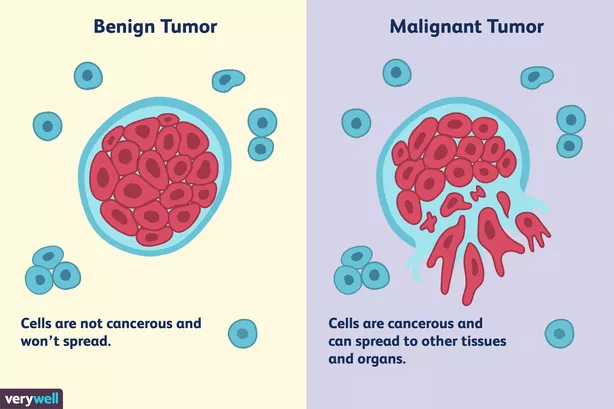


###  Importing dependencies

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Basic Workflow:
- 1)-- Loading/Reading the Dataset
- 2)-- Data Preprocessing and Analysis
- 3)-- Train - Test Split
- 4)-- Logistic Regression Model
- 5)-- Trained Logistic Regression model
- 6)-- Feed new data in Trained LR model
- 7)-- Prediction and accuracy for Benign and Malignant.

#### Loading the dataset.

In [2]:
df = pd.read_csv('Cancer_data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Data Preprocessing and Analysis

In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Checking the missing values.
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

So, According to our dataset, we consider the 'Target Feature' as 'Diagnosis' , As it will tell us the predictions like, whether the person has the Malignant or Benign Cancer type, and rest all the other features as 'Independent Features'. So this Basically, comes under the Binary Classification problem, and as we know most of the time Logistic regression plays a better role with binary classification to predict the categories like: yes/no,1/0,B/M etc.

Moving on further, we see there is no missing data or missing/Nan values in any of the feature but one ie;'Unnamed: 32',which contains only the Nan values , so we will drop this prticular column, as it will be of no use for our model.

- we will now be calculating some of the statistical measures of our dataset, to get the values which is followed in the next step.

##### Statistical measures of the dataset

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [8]:
# Encoding the target column which is 'diagnosis':
df.replace({'diagnosis':{'M':0,'B':1}},inplace = True)

As we encoded our target column from categorical to the numerical data, so that it will be at ease for our Machine Learning model to perform the predictions, where :
- Malignant = '0'
- Benign    = '1'

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


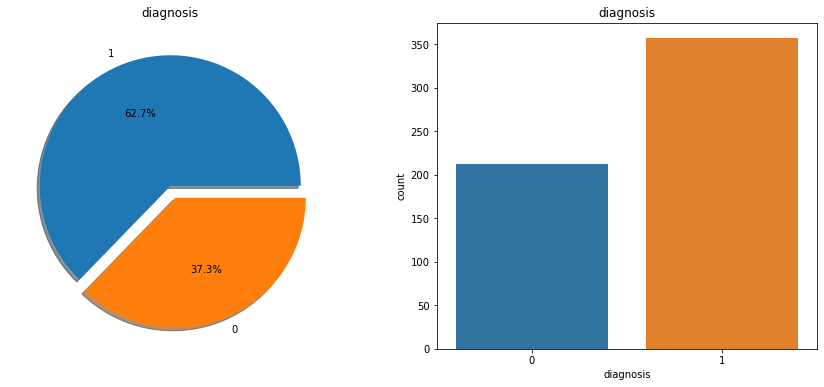

In [9]:
f,ax=plt.subplots(1,2,figsize=(15,6))
df['diagnosis'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
sns.countplot('diagnosis',data=df,ax=ax[1])
ax[1].set_title('diagnosis')
plt.show()

As we already represented the category of diagnosis which shows: 0 as Malignant and 1 as Benign, which from the above graph we can tell that 37.3% of the patients are suffering from Malignant, and approximately 63% is suffering from Benign, in addition with the other plot which tells the count of the categories of the diagnosis.

In [10]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
df = df.drop(columns= ['id','Unnamed: 32'],axis = 1)

In [12]:
df.shape
# Now we have 30 independent features with one target column.

(569, 31)

In [13]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
## Checking the distribution of the target variable.
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [15]:
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# 

We now checked the distribution of the 'diagnosis', ie; how many number of times the 2 diagnosis occurred;which means 'Benign' has been noticed in 357 patients and 'Malignant' has be observed in 212 patients.
And then we grouped the mean of the diagnosis in every parameter.
Moving forward we calculated the correlation between each and every parameter with it's given data.

In [16]:
# Lets see the correlation for the data.
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,...,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<AxesSubplot:>

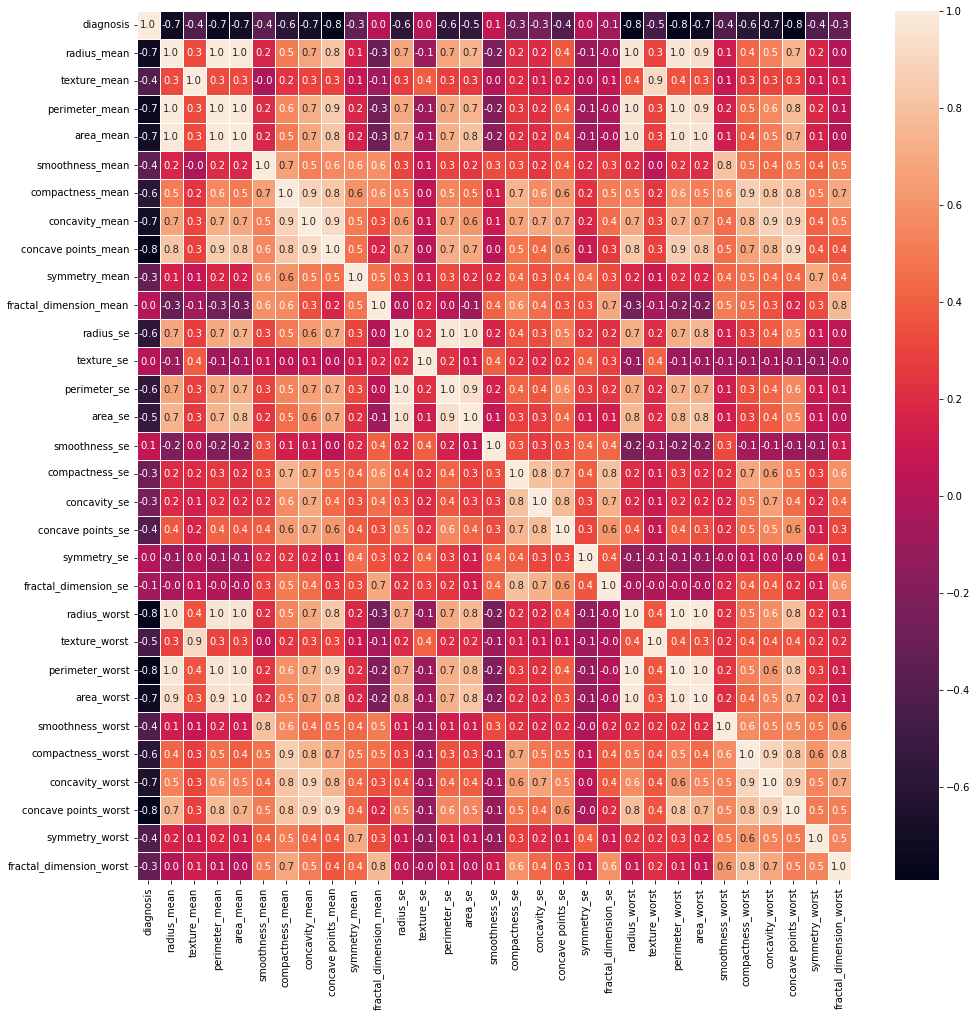

In [17]:
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f')

The above heatmap shows the correlation of all the features, where we observed that many of the features are simultaneously correlated to each other,let's gather all the correlated columns and then check their correlation seperately. 

In [18]:
feature=['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'area_se', 'concavity_se', 'fractal_dimension_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst']
df1=df[feature]
df1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,area_se,concavity_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst
0,10.38,1001.0,0.11840,0.3001,153.40,0.05373,0.006193,0.1622,0.7119,0.4601
1,17.77,1326.0,0.08474,0.0869,74.08,0.01860,0.003532,0.1238,0.2416,0.2750
2,21.25,1203.0,0.10960,0.1974,94.03,0.03832,0.004571,0.1444,0.4504,0.3613
3,20.38,386.1,0.14250,0.2414,27.23,0.05661,0.009208,0.2098,0.6869,0.6638
4,14.34,1297.0,0.10030,0.1980,94.44,0.05688,0.005115,0.1374,0.4000,0.2364


After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features. Actually,  there is correlation value 0.9 but lets see what happens if it is not dropped.

<AxesSubplot:>

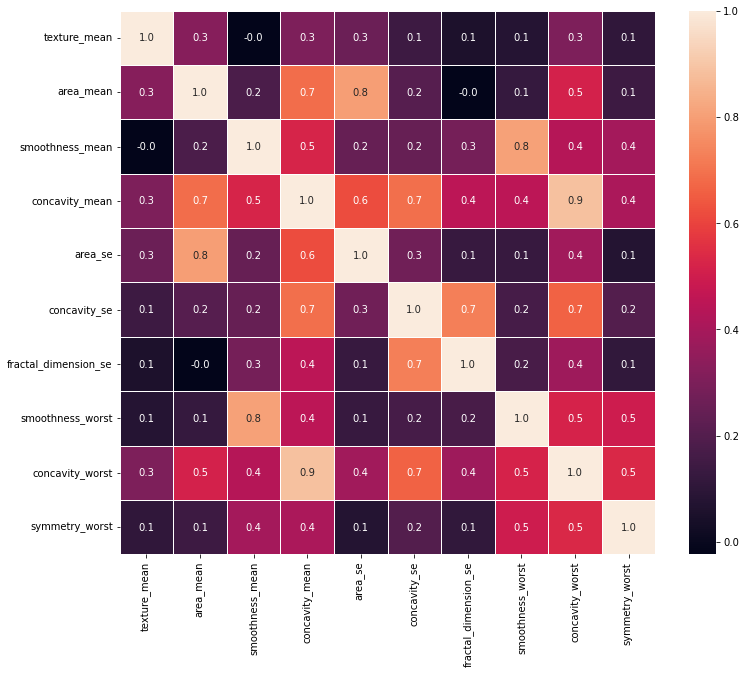

In [19]:
plt.figure(figsize = (12,10))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f')

# 

#### splitting the features and target in x and y respectively.

In [20]:
x = df.drop(columns = 'diagnosis',axis =1)
y = df['diagnosis']

In [21]:
print('x shape is : ',x.shape)
print('y shape is : ',y.shape)

x shape is :  (569, 30)
y shape is :  (569,)


##### Splitting the data into training and testing data:

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state=42)

In [24]:
print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [25]:
print('x_train shape is :',x_train.shape)
print('x_test shape is: ',x_test.shape)
print('y_train shape is: ',y_train.shape)
print('y_test shape is: ',y_test.shape)

x_train shape is : (398, 30)
x_test shape is:  (171, 30)
y_train shape is:  (398,)
y_test shape is:  (171,)


#### Model Training

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
# trainijng the Logistic regression model using training data.
model.fit(x_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

##### Accuracy score

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

In [30]:
# Accuracy on traing data.
x_train_predictions = model.predict(x_train)
train_data_accuracy = accuracy_score(y_train,x_train_predictions)

In [31]:
x_test_predictions = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_predictions)

In [32]:
print('Accuracy score of training data is: ',train_data_accuracy)

Accuracy score of training data is:  0.9396984924623115


In [33]:
# Accuracy for test data:
x_test_predictions = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_predictions)

In [34]:
print('Accuracy score for test data is : ',test_data_accuracy)

Accuracy score for test data is :  0.9707602339181286


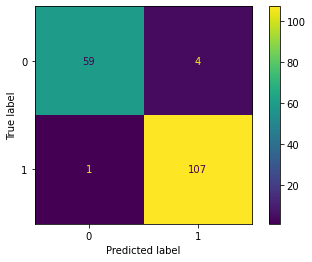

In [35]:
plot_confusion_matrix(model,x_test,y_test)

#### Building the predictive system 

In [36]:
input_data = (0,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985)

In [37]:
# Change the input data to numpy array
numpy = np.asarray(input_data)

# reshape the array.
reshaped = numpy.reshape(1,-1)

prediction = model.predict(reshaped)
print(prediction)

if (prediction[0]==0):
    print('The Breast cancer is Malignant.')
else:
    print('The breast cancer is Belign.')

[0]
The Breast cancer is Malignant.


After Splitting the data into 'x' and 'y' , we then split the data into training and test data.Later on which we trained our model with the Logistic Regression so that we can check our accuracy score for our train and test data respectively.

The Accuracy score of training and test data is 95% and 92% respectively, which means our model is working well with its predictions of detecting whether the cancer diagnosis type is 'Benign' or 'Malignant'.

The time of Building Predictive system,we feed the model with the input-data, so that we can check whether the model is working well or not, and we see that our model is working perfectly fine.

And Now lets predict the model using KNN Classifier.

## Using KNN

Let's start with k = 1 for our predictions

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn= KNeighborsClassifier(n_neighbors=1)

In [40]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:
pred = knn.predict(x_test)

In [42]:
pred.shape

(171,)

##### Predictions and Evaluation

In [43]:
print('\n Confusion Matrix \n\n',confusion_matrix(y_test,pred))
print('=========================================================')
print('\n Classification Report \n\n',classification_report(y_test,pred))


 Confusion Matrix 

 [[ 56   7]
 [  4 104]]

 Classification Report 

               precision    recall  f1-score   support

           0       0.93      0.89      0.91        63
           1       0.94      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



We see that for k=1 , The False Positive and False Negative is 7 and 6 respectively, in addition to it, our accuracy and f1-score is also quite less, which can be corrected by using the correct or near by correct k-value so that we can decrease our false positive and false negative rates plus we can also increase our accuracy and f1-score simultaneously.

Now let's try to choose the correct k-value using the elbow method.

##### Choosing the good k - value using elbow method.

In [44]:
error_rate= []

In [45]:
for i in range(1,100):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

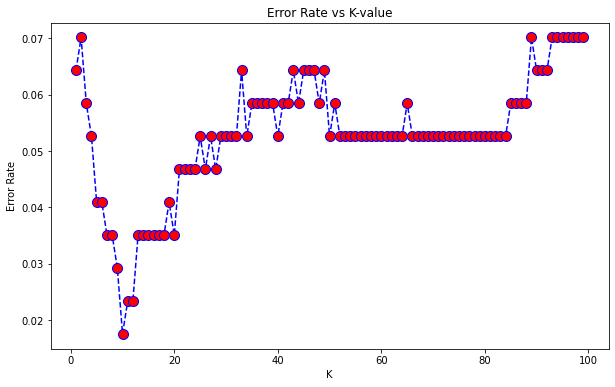

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')

##### Let's choose the k-value = 10 and also compare it with k=1

In [47]:
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print('\n\nWith K = 1')
print('\n')
print('\n Confusion Matrix \n\n',confusion_matrix(y_test,pred))
print('=========================================================')
print('\n Classification Report \n\n',classification_report(y_test,pred))



With K = 1



 Confusion Matrix 

 [[ 56   7]
 [  4 104]]

 Classification Report 

               precision    recall  f1-score   support

           0       0.93      0.89      0.91        63
           1       0.94      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [48]:
knn = KNeighborsClassifier(n_neighbors= 10)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print('\n\nWith K = 10')
print('\n')
print('\n Confusion Matrix \n\n',confusion_matrix(y_test,pred))
print('=========================================================')
print('\n Classification Report \n\n',classification_report(y_test,pred))



With K = 10



 Confusion Matrix 

 [[ 61   2]
 [  1 107]]

 Classification Report 

               precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



#### Cross validation:

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
accuracy_rate = []

In [51]:
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn,x, df['diagnosis'],cv= 10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

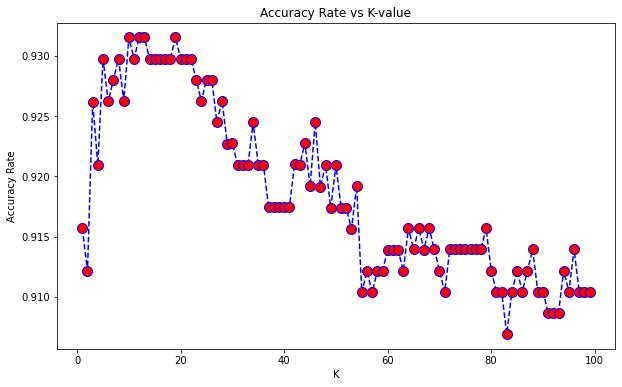

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy Rate vs K-value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

So this was our predictions by our model with different Classifiers ie; - Logistic Regression and KNN classifier.
According to which we get the respective results.
For Logistic Regression the accuracy score for predictions of train and test data are 93% and 97% respectively.

while using KNN classifier we got the results as:

First when k = 1,we had our precision and recall as 94% and 89% respectively.
And After choosing the K-value with the help of elbow method, the results are as follows : ie; when k=10; we get
the Precision and Recall as 98% and 97% respectively.

And we know in a cancer diagnosis, if the person doesn't have the cancer and our model is predicting that the person has the cancer, then it is precision or false positive, whose rate quite doesn't matter.

BUT..

If the person, has the cancer and our model predicted as the person doesn't have it, then it is really a big issue , where we see the medication will not be done or the cure too or it may also get delayed. Also it can be the matter of Life and Death for someone. So this case is recall , where the rate of False negative is really importatnt. So we can say here that Percentage of recall is really important.